In [54]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score,r2_score,f1_score

In [9]:
df=pd.read_csv('C:/Users/Rana/Desktop/pwskills/4-5th April Decision Tree/Diabetes Prediction Using DT/dataset/diabetes.csv')

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> Here's a fault in BMI column min value as BMI can't be zero

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

>No missing values


In [12]:
df.duplicated().sum()

0

>No duplicates

In [21]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                          object
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

>So the BMI column is a object type 

In [50]:
#here we're converting the values in BMI column to int and if there is any non-numeric value(Object,na,Nan) or whatever 
#it'll be replaced using .to_numeric function it converts them to NaN.
#further it'll be replaced and filled with 0 using fillna(0) and then whole will be converted to int datatype  
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce').fillna(0).astype(int)

In [51]:
#replacing 0 values of BMI column with mean
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992188,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,6.879097,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.000000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.000000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.420000,81.000000,1.000000


>  we don't have to do with Glucose BloodPressure SkinThickness and Insulin column as they're already in correct datatype

c:\Users\Rana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: >

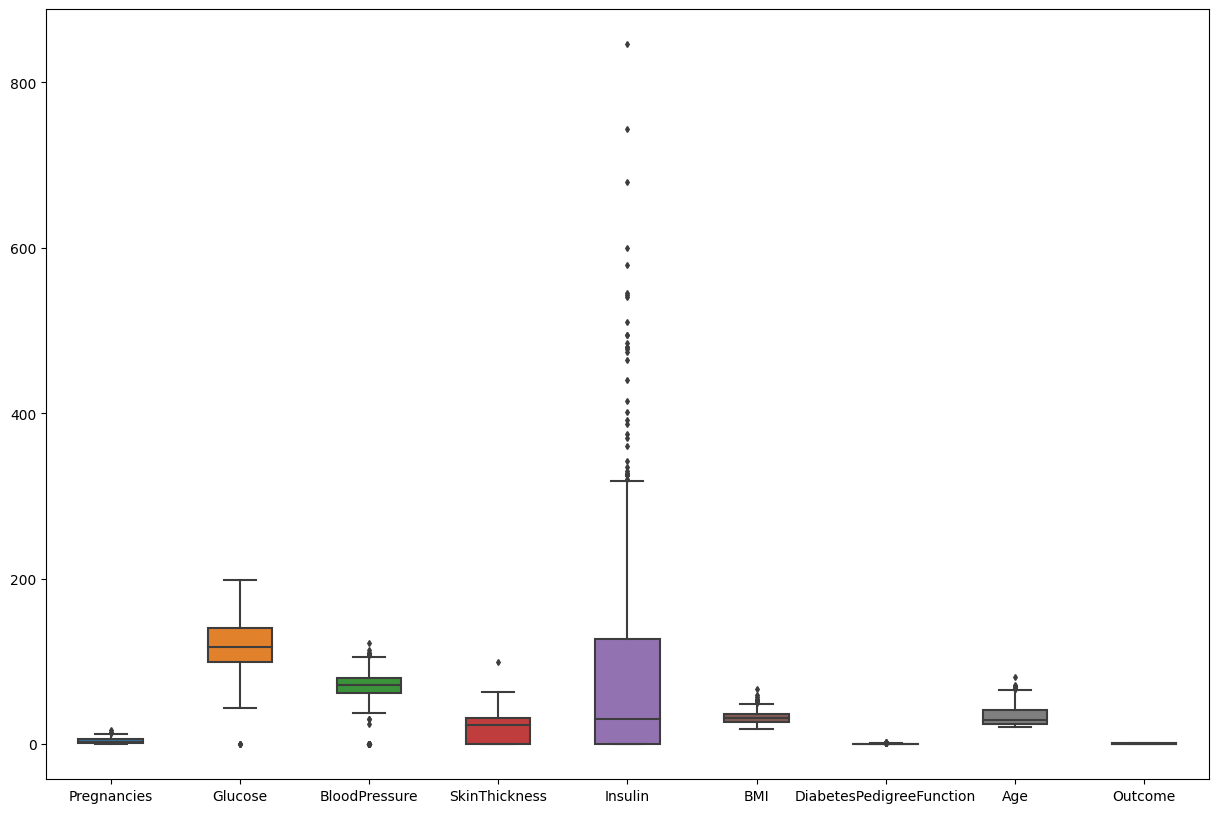

In [55]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

> omg insulin is having so many outliers and much effecting std dev of data 

In [68]:
#let's handle the outliers present in Insulin Column
#we'll replace the outliers with IQR 
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
#print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Insulin'] = df['Insulin'].apply(lambda x: x if lower_bound <= x <= upper_bound else df['Insulin'].median())

c:\Users\Rana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Rana\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

<Axes: >

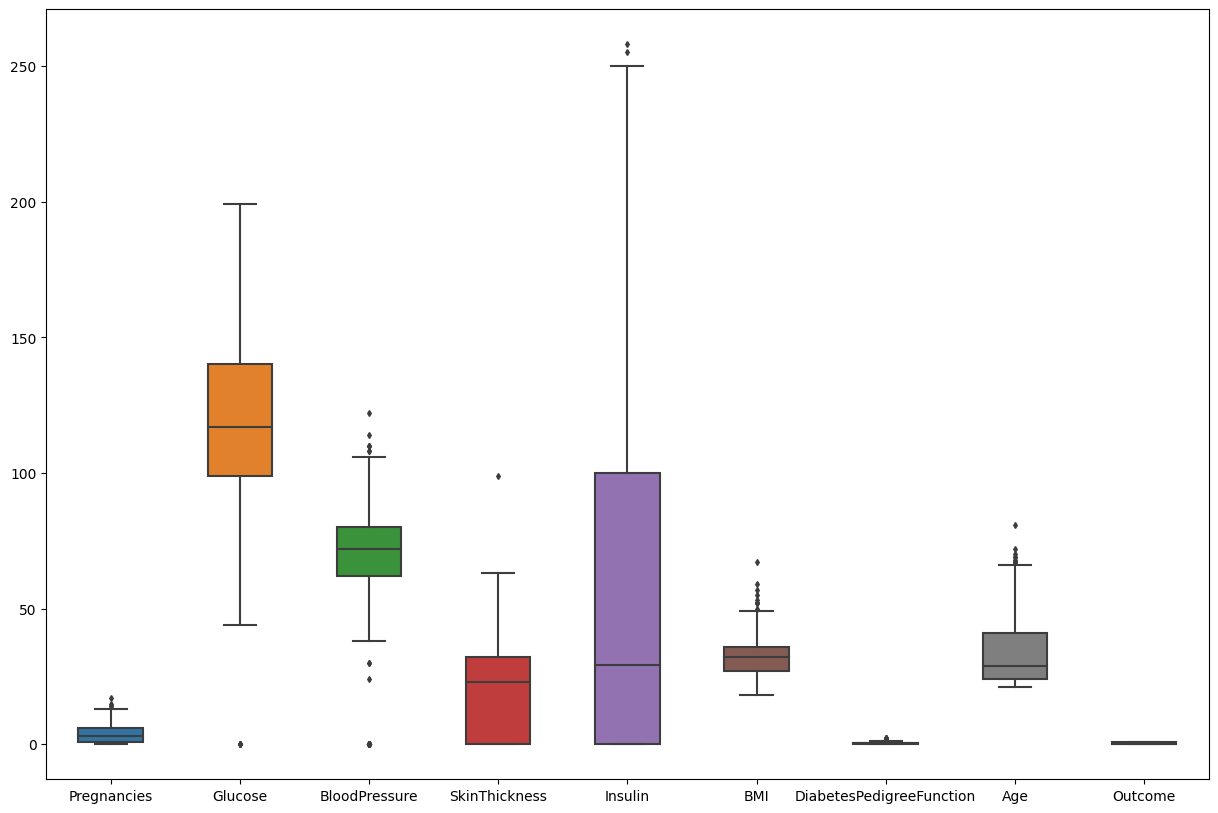

In [69]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

> we can still see that there are some outliers still 
we can handle them by Adjusting the Outlier Threshold we can make the outlier threshold more stringent by increasing the multiplier from 1.5 to a higher value, such as 2.0 or 3.0. This would classify fewer data points as outliers, but it might also result in retaining some extreme values that are genuinely important.

In [70]:
#segregating the data into features and target
X = df.drop(columns='Outcome')
y = df['Outcome']

In [71]:
#splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
#decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
#cross-validation to optimize the hyperparameters and avoid overfitting.
#we'll use entropy as criterion and max_depth as 3
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [82]:
y_pred = clf.predict(X_test)  
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score 
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

[[85 14]
 [21 34]]
0.7727272727272727
0.010101010101009833
0.6601941747572815


In [96]:
# to apply cross validation
from sklearn.model_selection import GridSearchCV

param_grid={'criterion':['gini','entropy','log_loss'],
            'splitter':['best', 'random'],
            'max_depth':[5]
            }


In [97]:
grid=GridSearchCV(tree.DecisionTreeClassifier(),param_grid,cv=5)

In [98]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5], 'splitter': ['best', 'random']})

In [99]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}

In [100]:
y_pred_grid =grid.predict(X_test)  

print(classification_report(y_test,y_pred_grid))
print(confusion_matrix(y_test,y_pred_grid))
print(accuracy_score(y_test,y_pred_grid))
print(r2_score(y_test,y_pred_grid))
print(f1_score(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

[[83 16]
 [19 36]]
0.7727272727272727
0.010101010101009833
0.6728971962616823


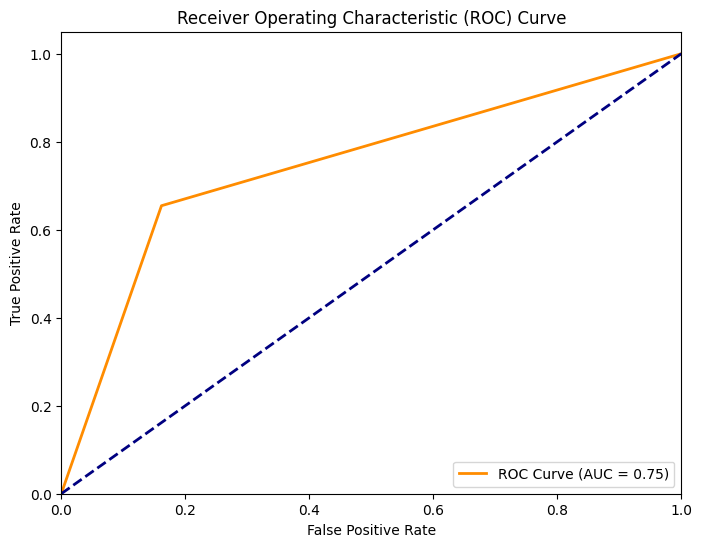

In [105]:
from sklearn.metrics import roc_curve, roc_auc_score


# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_grid)
roc_auc = roc_auc_score(y_test, y_pred_grid)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.5\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.07\nsamples = 119\nvalue = [118, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.627\nsamples = 102\nvalue = [86, 16]'),
 Text(0.375, 0.375, 'x[5] <= 25.5\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [30, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.983\nsamples = 139\nvalue = [80, 59]'),
 Text(0.75, 0.625, 'x[1] <= 166.5\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[5] <= 29.5\nentropy = 1.0\nsamples = 162\nvalue = [80, 82]'),
 Text(0.5625, 0.125, 'entropy = 0.811\nsamples = 52\nvalue = [39, 13]'),
 Text(0.6875, 0.125, 'entropy = 0.953\nsamples = 110\nvalue = [41, 69]'),
 Text(0.875, 0.375, 'x[1] <= 178.5\nen

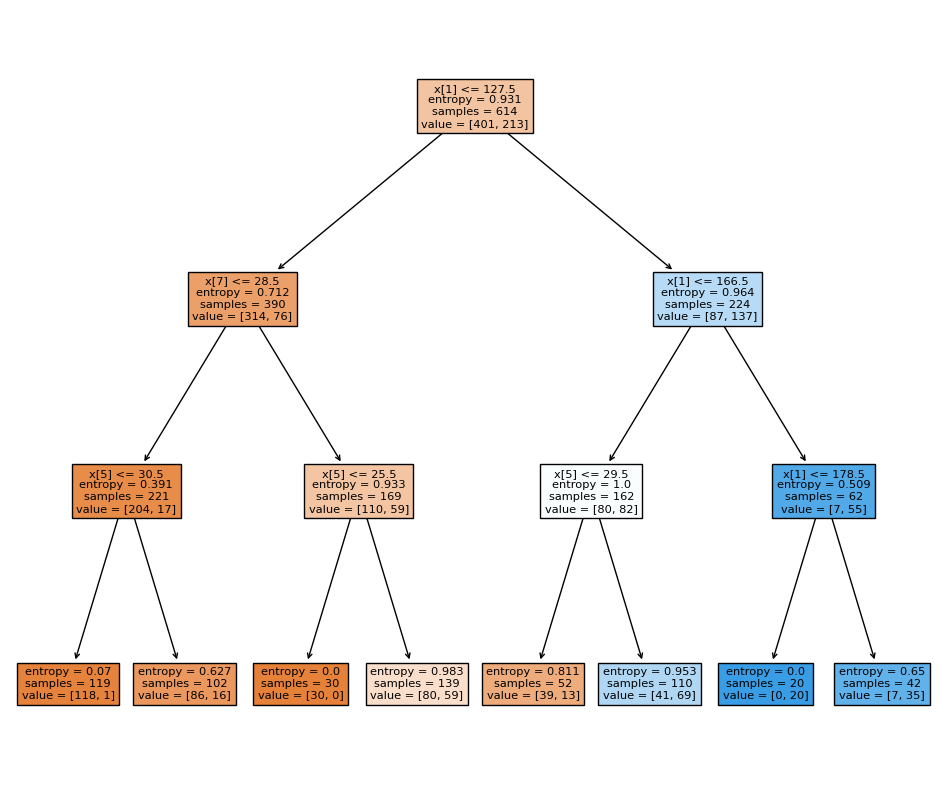

In [108]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf,filled=True)

In [110]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## from above visualization we can see that Glucose
## then Age
## then BMI are the most important features

In [114]:
from sklearn.model_selection import KFold

# Step 1: Load the Iris dataset and split into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train a decision tree model on the training set
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 3: Apply the model to new data (test set)
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Step 4: Cross-validation for robustness assessment
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X, y, cv=kf)
print(f"Cross-Validation Mean Accuracy: {np.mean(cv_scores):.2f}")


scenario_data = np.array([[5.0, 3.0, 2.0, 1.0,2.5,8.0,9.5,6.3],  # Scenario 1
                          [6.0, 3.5, 5.5, 2.0,7.5,4.2,6.3,1.2]]) #Scenario 2
scenario_predictions = clf.predict(scenario_data)
print("Scenario 1 Predictions:", scenario_predictions[0])
print("Scenario 2 Predictions:", scenario_predictions[1])

Test Set Accuracy: 0.68
Cross-Validation Mean Accuracy: 0.73
Scenario 1 Predictions: 0
Scenario 2 Predictions: 0


c:\Users\Rana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
